In [4]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score 
import keras 
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LeakyReLU,ELU
from keras.layers import Dropout

In [5]:
# load the dataset
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape

(7043, 21)

In [7]:
#checkinh the columns in dataset 
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# drop those columns which is the not best for models 
data.drop(columns=['customerID', 'TotalCharges'], inplace=True)

In [9]:
# checking the null values in dataset 
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [10]:
# check the duplicates values in dataset 
data.duplicated().sum()

np.int64(27)

In [11]:
# know drop the duplicated values from dataset 
data=data.drop_duplicates()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7016 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7016 non-null   object 
 1   SeniorCitizen     7016 non-null   int64  
 2   Partner           7016 non-null   object 
 3   Dependents        7016 non-null   object 
 4   tenure            7016 non-null   int64  
 5   PhoneService      7016 non-null   object 
 6   MultipleLines     7016 non-null   object 
 7   InternetService   7016 non-null   object 
 8   OnlineSecurity    7016 non-null   object 
 9   OnlineBackup      7016 non-null   object 
 10  DeviceProtection  7016 non-null   object 
 11  TechSupport       7016 non-null   object 
 12  StreamingTV       7016 non-null   object 
 13  StreamingMovies   7016 non-null   object 
 14  Contract          7016 non-null   object 
 15  PaperlessBilling  7016 non-null   object 
 16  PaymentMethod     7016 non-null   object 
 17  

In [13]:
# statistical summary of numerical columns
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7016.000000,7016.000000,7016.000000
mean,0.162628,32.462087,64.869897
std,0.369052,24.526687,30.055654
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [14]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

In [15]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [16]:
# checking the phone services count laves in dataset 
data['PhoneService'].value_counts()

PhoneService
Yes    6334
No      682
Name: count, dtype: int64

In [17]:
# checking the genders values 
data['gender'].value_counts()

gender
Male      3537
Female    3479
Name: count, dtype: int64

In [18]:
# Know checking the how many people have partner and single 
data['Partner'].value_counts()

Partner
No     3617
Yes    3399
Name: count, dtype: int64

In [19]:
# checking the internetservice available 
data['InternetService'].unique().tolist()

['DSL', 'Fiber optic', 'No']

In [20]:
# checking the values of internetservices
data['InternetService'].value_counts()

InternetService
Fiber optic    3089
DSL            2419
No             1508
Name: count, dtype: int64

In [21]:
data['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     58
19.85     45
19.95     44
19.90     43
20.00     43
          ..
97.90      1
116.40     1
31.65      1
39.05      1
26.50      1
Name: count, Length: 1585, dtype: int64

In [22]:
# Convert 'Churn' to binary
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Convert 'TotalCharges' to numeric (handle errors)
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')

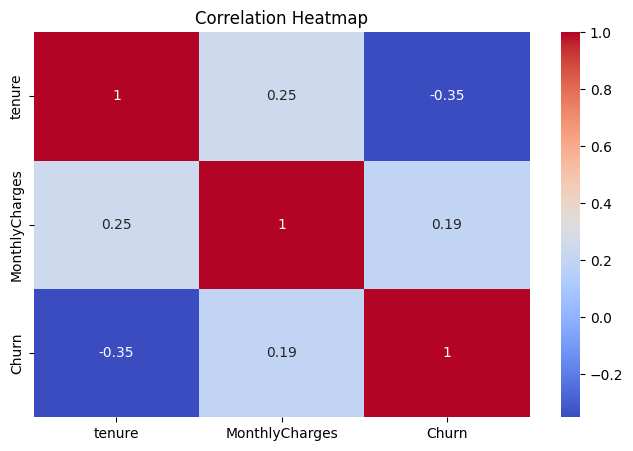

In [23]:
# Correlation heatmap (numerical columns)
plt.figure(figsize=(8, 5))
sns.heatmap(data[['tenure', 'MonthlyCharges', 'Churn']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

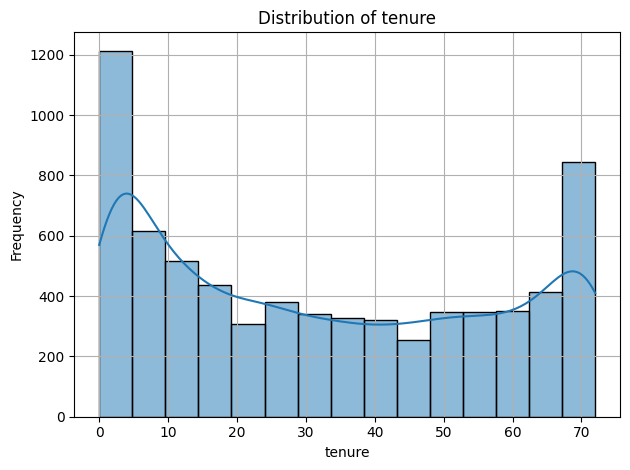

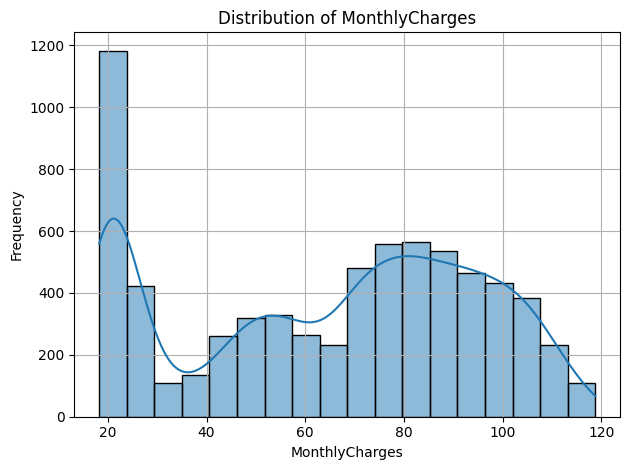

In [24]:
# Histograms of numerical features
numerical_cols = ['tenure', 'MonthlyCharges',]
for col in numerical_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [25]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

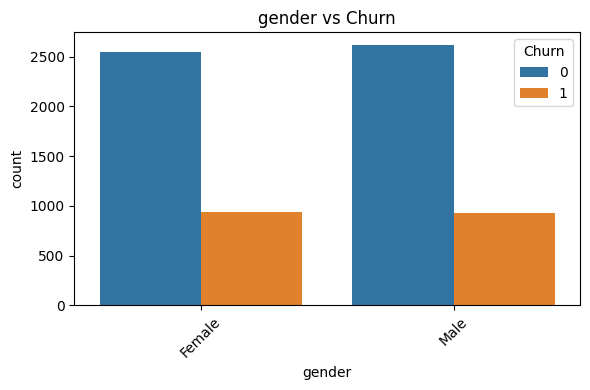

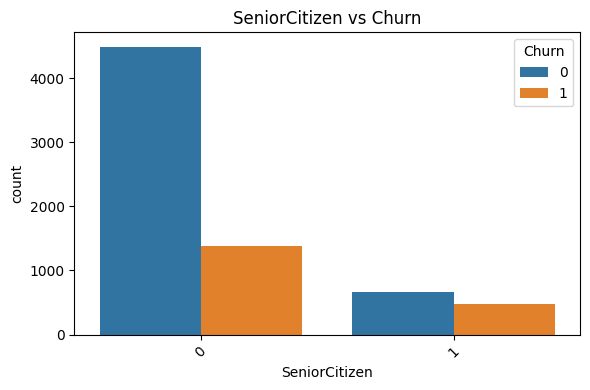

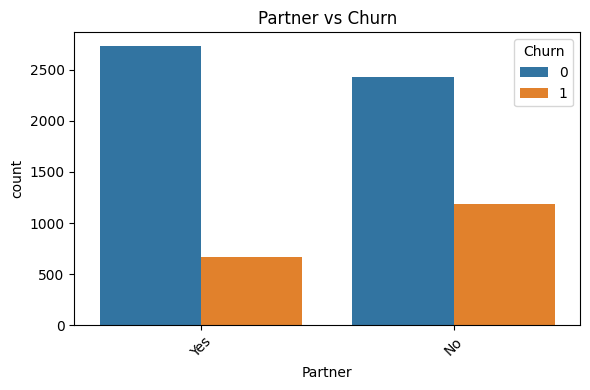

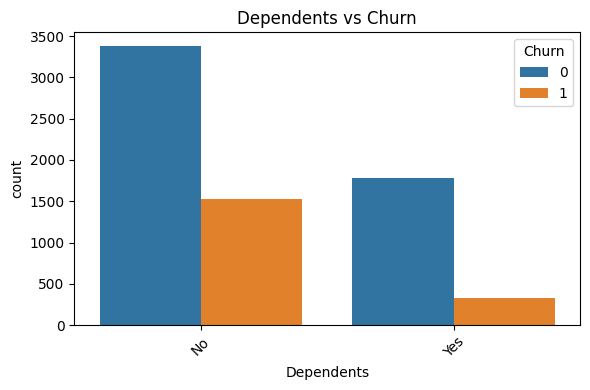

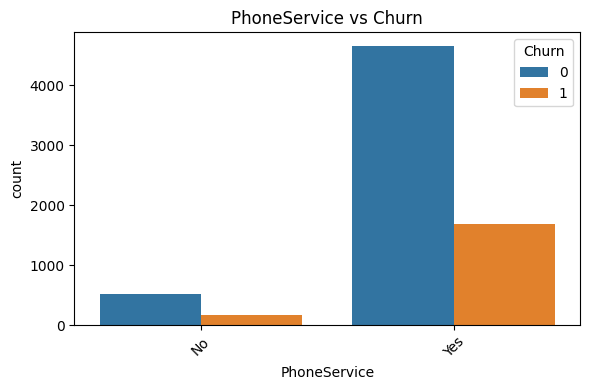

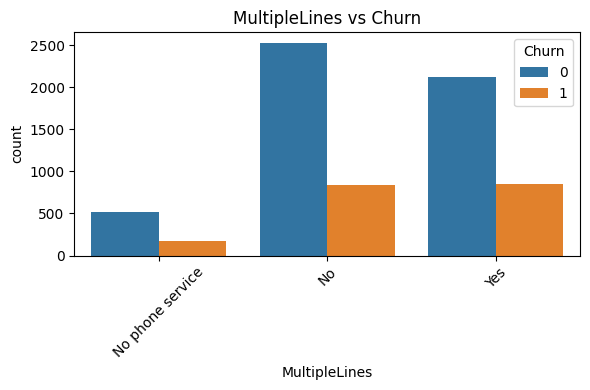

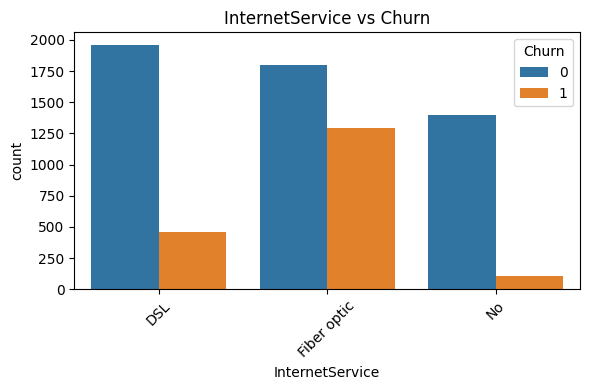

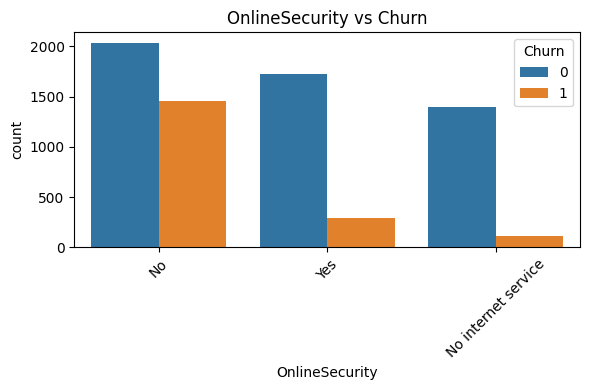

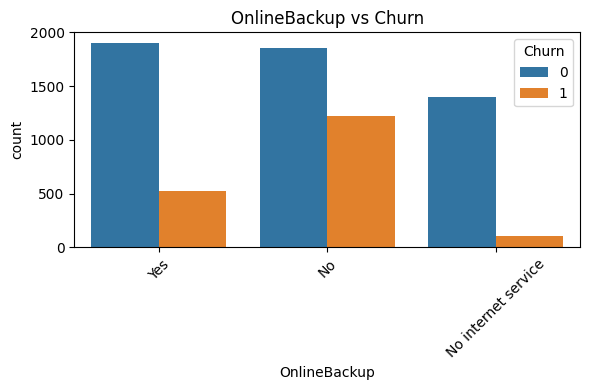

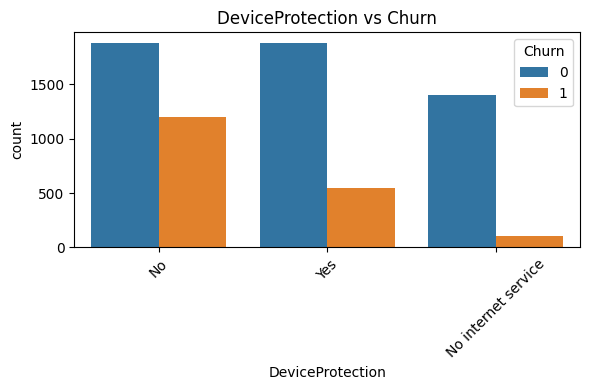

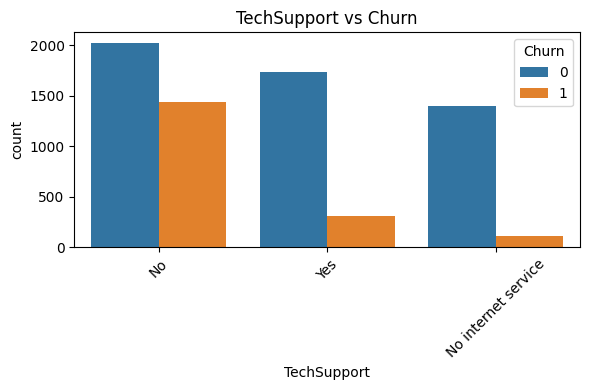

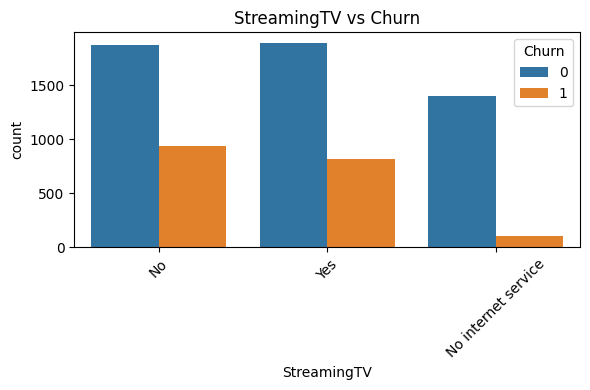

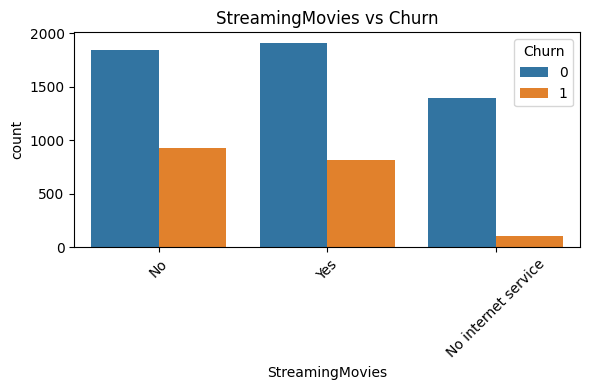

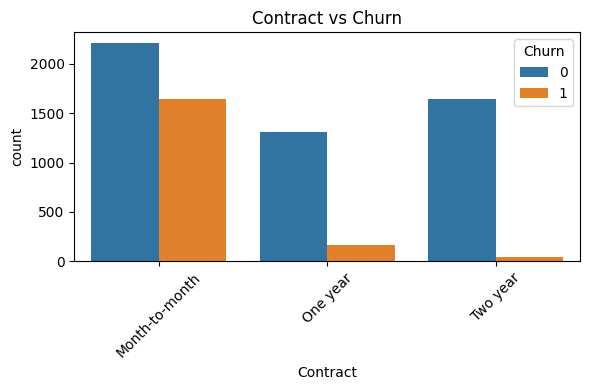

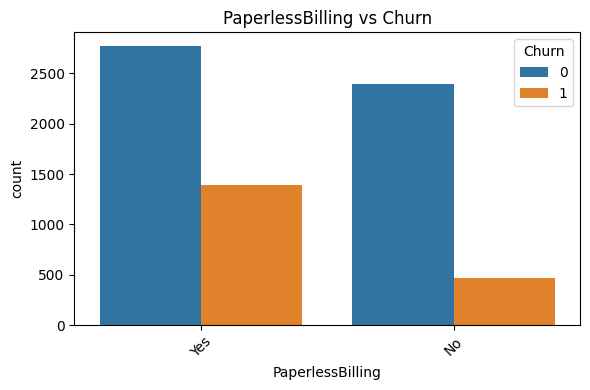

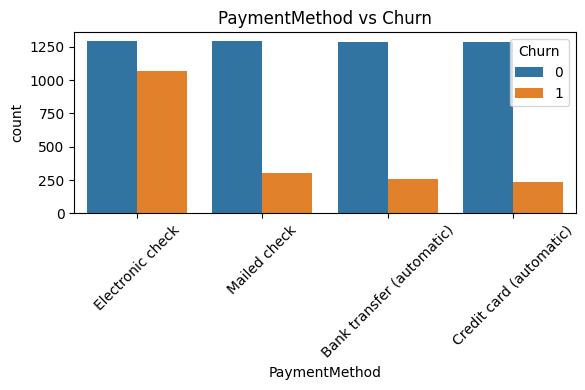

In [26]:
# Categorical variables countplots vs Churn
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
# Safe EDA loop for categorical columns
for col in categorical_cols:
    if data[col].isnull().all():
        print(f"Skipping {col} - all values are missing.")
        continue

    if data[col].nunique() == 0:
        print(f"Skipping {col} - no unique values.")
        continue

    plt.figure(figsize=(6, 4))
    try:
        sns.countplot(data=data, x=col, hue='Churn')
        plt.title(f'{col} vs Churn')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not plot {col} due to: {e}")


In [27]:
# Encoding change the string columns in numerical 
ec=LabelEncoder()
data['gender']=ec.fit_transform(data['gender'])
data['Partner']=ec.fit_transform(data['Partner'])
data['Dependents']=ec.fit_transform(data['Dependents'])
data['PhoneService']=ec.fit_transform(data['PhoneService'])
data['MultipleLines']=ec.fit_transform(data['MultipleLines'])
data['InternetService']=ec.fit_transform(data['InternetService'])
data['OnlineSecurity']=ec.fit_transform(data['OnlineSecurity'])
data['OnlineBackup']=ec.fit_transform(data['OnlineBackup'])
data['DeviceProtection']=ec.fit_transform(data['DeviceProtection'])
data['TechSupport']=ec.fit_transform(data['TechSupport'])
data['StreamingTV']=ec.fit_transform(data['StreamingTV'])
data['StreamingMovies']=ec.fit_transform(data['StreamingMovies'])
data['Contract']=ec.fit_transform(data['Contract'])
data['PaperlessBilling']=ec.fit_transform(data['PaperlessBilling'])
data['PaymentMethod']=ec.fit_transform(data['PaymentMethod'])

In [28]:
# feature selection 
X=data.drop('Churn',axis=1)
y=data['Churn']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [31]:
X_train.shape

(5612, 18)

In [32]:
model=Sequential()
model.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu',input_dim=18))
model.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

c:\Users\Shrawan Kumar\Desktop\My Code\Telecom_customer_churn_prediction\venv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7394 - loss: 0.5104 - val_accuracy: 0.7732 - val_loss: 0.4600
Epoch 2/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7859 - loss: 0.4474 - val_accuracy: 0.7759 - val_loss: 0.4580
Epoch 3/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7928 - loss: 0.4355 - val_accuracy: 0.7846 - val_loss: 0.4498
Epoch 4/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7968 - loss: 0.4245 - val_accuracy: 0.7829 - val_loss: 0.4630
Epoch 5/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8000 - loss: 0.4201 - val_accuracy: 0.7883 - val_loss: 0.4659
Epoch 6/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8013 - loss: 0.4117 - val_accuracy: 0.7883 - val_loss: 0.4500
Epoch 7/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8051 - loss: 0.4066 - val_accuracy: 0.7792 - val_loss: 0.4551
Epoch 8/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8114 - loss: 0.4009 - val_accu

In [35]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [36]:
cm=confusion_matrix(y_test,y_pred)

In [37]:
score=accuracy_score(y_test,y_pred)
print(score)

0.75997150997151
